In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from tqdm import tqdm 
from sklearn.datasets import load_breast_cancer
from utils import *

In [2]:
"""Load and return the breast cancer wisconsin dataset.
The breast cancer dataset is a classic and very easy binary classification dataset.
"""
data = load_breast_cancer(return_X_y=True, as_frame=True)
len(data)

2

In [3]:
data[0]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [20]:
# preparing the target
y = np.array(data[1].iloc[0:500])
print(np.unique(y, return_counts=True))

y_test = np.array(data[1].iloc[500:])
print(np.unique(y_test, return_counts=True))

(array([0, 1]), array([195, 305]))
(array([0, 1]), array([17, 52]))


In [21]:
# preparing the data
X = np.array(data[0].iloc[0:500, :])
X_test = np.array(data[0].iloc[500:, :])

# centering and normal standardization
for i in range(X.shape[1]):
    X[:,i] = (X[:,i] - X[:,i].mean())/X[:,i].std()
    X_test[:,i] = (X_test[:,i] - X_test[:,i].mean())/X_test[:,i].std()


(69, 30)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
y_train = y_train.reshape((len(y_train), 1))
y_val = y_val.reshape((len(y_val), 1))
X_train = X_train.T
X_val = X_val.T
y_train = y_train.T
y_val = y_val.T

### Train a perceptron model

train_loss : 0.6447789857984576 val_loss : 0.6354132808024684 train_acc : 0.605 val_acc : 0.63 norm_gradL : 0.1678837381568533
train_loss : 0.5560976442134878 val_loss : 0.5496743701835306 train_acc : 0.8225 val_acc : 0.79 norm_gradL : 0.20039858654434467
train_loss : 0.4762704387855587 val_loss : 0.47140965802044094 train_acc : 0.895 val_acc : 0.87 norm_gradL : 0.19943217017657353
train_loss : 0.4051135493749638 val_loss : 0.40219816808904346 train_acc : 0.9075 val_acc : 0.87 norm_gradL : 0.18428301730110241
train_loss : 0.3469852732941676 val_loss : 0.34680488092907874 train_acc : 0.91 val_acc : 0.87 norm_gradL : 0.15847076284491218
train_loss : 0.3026777340800294 val_loss : 0.3032986079990686 train_acc : 0.92 val_acc : 0.9 norm_gradL : 0.13699244376658118
train_loss : 0.2678808184181724 val_loss : 0.2690849566975126 train_acc : 0.925 val_acc : 0.91 norm_gradL : 0.11924536662562484
train_loss : 0.2404751981370998 val_loss : 0.24263818081444918 train_acc : 0.9275 val_acc : 0.94 norm_g

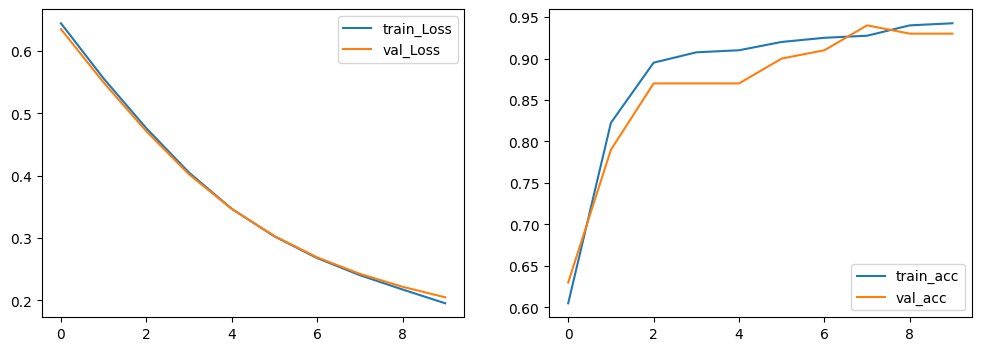

In [12]:
parameters, norm_gradL=NN_2_layers(X_train, y_train, X_val, y_val, learning_rate=0.001, err=1e-5, max_iter=50000, displaying_step = 5000)

### Make a prediction on the test data 

In [23]:
print(X_test.shape)
print(y_test.shape)

(69, 30)
(69,)


In [24]:
X_test = X_test.T
y_test = y_test.reshape((1, len(y_test)))

y_test_pred = predict(X_test, parameters)
print("test accuracy :", accuracy(y_test, y_test_pred))

test accuracy : 0.8695652173913043


### The test accuracy increase to 46% compared to a simple perceptron

In [25]:
predict(X_test, parameters, proba = True)

array([[0.19025595, 0.10617206, 0.89211265, 0.10416051, 0.64912759,
        0.92670943, 0.93424249, 0.93882075, 0.92228875, 0.10504399,
        0.93929902, 0.94028831, 0.1044406 , 0.42397156, 0.18716358,
        0.92793611, 0.10492988, 0.10532335, 0.11150409, 0.80273173,
        0.90760194, 0.10415845, 0.94107487, 0.52287385, 0.92624024,
        0.93450374, 0.21288273, 0.91977495, 0.22416906, 0.92001253,
        0.39737967, 0.83412482, 0.91007252, 0.10491983, 0.93575617,
        0.10419767, 0.29371415, 0.49685639, 0.94152902, 0.94159132,
        0.94101117, 0.41180359, 0.59112553, 0.86674667, 0.92040091,
        0.8971506 , 0.94105926, 0.94117818, 0.93904445, 0.92338099,
        0.94156708, 0.93560572, 0.93986456, 0.94117618, 0.93886725,
        0.93692372, 0.94144267, 0.94004491, 0.52955774, 0.74265872,
        0.29012373, 0.93867118, 0.10416752, 0.1041567 , 0.10417549,
        0.10434809, 0.25749784, 0.10415661, 0.94111074]])